# Project 2: Working with Web Data
## Author: Thulasiram Veeramangalam

# XML Sitemap Parsing with Python

This notebook demonstrates the process of parsing XML sitemaps from the website "https://www.codingninjas.com". We utilize the `SitemapParser` class to extract and analyze the sitemap, providing insights into the website's structure.


In [2]:
# Importing necessary libraries
import pandas as pd
from sitemap_parser import SitemapParser  # Ensure sitemap_parser.py is in the same directory or in the Python path


## Initializing the SitemapParser

We'll initialize the `SitemapParser` class with the base URL of "https://www.codingninjas.com" to parse its sitemaps.


In [3]:
# Initialize SitemapParser
sitemap_scraper = SitemapParser("https://www.codingninjas.com")


## Parsing Sitemaps and Saving Data

The parser will go through the sitemaps found in the website's `robots.txt` and save the extracted URLs into CSV files. We limit the number of sitemaps processed to manage the scraping scope.


In [4]:
# Parsing sitemaps and saving the data
sitemap_scraper.save_to_csv()


## Combining and Displaying Extracted Data

After parsing, we'll combine the data from all sitemaps into a single DataFrame for a comprehensive view of the scraped URLs.


In [ ]:
# Combining data from all parsed sitemaps
combined_df = pd.concat(sitemap_scraper.sitemap_data.values(), ignore_index=True)

# Displaying the first few rows of the combined DataFrame
combined_df.head()


## Saving Combined Data to CSV

For further analysis or record-keeping, we can save the combined DataFrame to a CSV file.


In [ ]:
# Saving the combined data to a CSV file
combined_df.to_csv("COMBINED_SITEMAPS.csv", index=False)


# Spaceflight News Data Collection and Analysis

In this notebook, we demonstrate how to use the `SpaceflightNewsScraper` class to fetch spaceflight news articles from the Spaceflight News API. We'll collect the data, examine its structure, and perform basic data exploration.


In [5]:
# Importing necessary libraries
import pandas as pd
from spaceflight_news_scraper import SpaceflightNewsScraper  # Make sure the module is in your Python path


## Initializing the SpaceflightNewsScraper

We initialize the `SpaceflightNewsScraper` with the base URL of the Spaceflight News API, along with specified limits for pagination and total articles.


In [6]:
# Initialize SpaceflightNewsScraper
base_url = "https://api.spaceflightnewsapi.net/v4/articles/"
per_page_limit = 500
total_limit = 5000

scraper = SpaceflightNewsScraper(base_url, per_page_limit, total_limit)


## Fetching Data from the API

Using the scraper, we'll fetch articles from the Spaceflight News API. The data will be compiled into a pandas DataFrame.


In [7]:
# Fetch data using the scraper
data = scraper.scrape_data()


## Exploring the Fetched Data

Let's take a look at the first few rows of the fetched data and understand its structure.


In [8]:
# Display the first few rows of the DataFrame
data.head()


,id,title,url,image_url,news_site,summary,published_at,updated_at,featured,launches,events
0,21571,"Sorry doubters, Starship actually had a remark...",https://arstechnica.com/space/2023/11/heres-wh...,https://cdn.arstechnica.net/wp-content/uploads...,Arstechnica,"On just its second flight, Starship now is arg...",2023-11-20T16:16:23Z,2023-11-20T16:39:22.641000Z,False,[],[]
1,21570,ESA Launch Call to Develop Life Support System...,https://europeanspaceflight.com/esa-launch-cal...,https://europeanspaceflight.com/wp-content/upl...,European Spaceflight,The European Space Agency has launched a call ...,2023-11-20T14:05:33Z,2023-11-20T14:09:44.097000Z,False,[],[]
2,21569,Emirati university signs up to China’s moon ba...,https://spacenews.com/emirati-university-signs...,https://spacenews.com/wp-content/uploads/2023/...,SpaceNews,China has added a United Arab Emirates’ univer...,2023-11-20T14:04:17Z,2023-11-20T14:09:15.536000Z,False,[],[]
3,21568,Daily Telescope: Spying a double cluster of su...,https://arstechnica.com/space/2023/11/daily-te...,https://cdn.arstechnica.net/wp-content/uploads...,Arstechnica,"""We had a lovely string of clear nights in lat...",2023-11-20T13:00:32Z,2023-11-20T13:09:22.848000Z,False,[],[]
4,21567,Sierra Space lays off 165 in workforce realign...,https://spacenews.com/sierra-space-lays-off-16...,https://spacenews.com/wp-content/uploads/2023/...,SpaceNews,Sierra Space laid off 165 employees who had be...,2023-11-20T11:42:57Z,2023-11-20T11:49:15.284000Z,False,[],[]


## Basic Analysis of the Data

We can perform some basic analysis on the fetched data, such as counting the number of articles, checking for missing values, or summarizing key columns.


In [9]:
# Example analysis
print(f"Total articles fetched: {data.shape[0]}")
print(f"Missing values in each column:\n{data.isnull().sum()}")


Total articles fetched: 5000
Missing values in each column:
id              0
title           0
url             0
image_url       0
news_site       0
summary         0
published_at    0
updated_at      0
featured        0
launches        0
events          0
dtype: int64


# Web Scraping Wikipedia Tables with BeautifulSoup

This notebook demonstrates how to use the `WikiTableParser` class to scrape tables from a specific Wikipedia page and convert them into pandas DataFrames. We'll be extracting data from the page on the largest companies in the United States by revenue.


In [1]:
# Importing necessary libraries
import pandas as pd
from wikitable_parser import WikiTableParser  


## Initializing the WikiTableParser

We'll initialize the `WikiTableParser` with the URL of the Wikipedia page containing tables of the largest companies in the United States by revenue.


In [2]:
# Initialize WikiTableParser with the Wikipedia page URL
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
parser = WikiTableParser(url)


## Scraping Tables from the Wikipedia Page

The parser will scrape all tables on the page, identified by the 'wikitable' class, and store them as pandas DataFrames.


In [3]:
# Parse tables from the Wikipedia page
parser.parse_tables()


## Displaying the Extracted Data

Let's display the first few rows of each scraped table to understand the structure and content of the data.


In [4]:
# Displaying the first few rows of each extracted DataFrame
dataframes = parser.get_dataframes()
for df in dataframes:
    print(f"Table Title: {df.title}\n")
    print(df.head(), "\n")


Table Title: Table 1

  Rank                Name                    Industry Revenue (USD millions)  \
0    1             Walmart                      Retail                611,289   
1    2              Amazon  Retail and cloud computing                513,983   
2    3          ExxonMobil          Petroleum industry                413,680   
3    4               Apple        Electronics industry                394,328   
4    5  UnitedHealth Group                  Healthcare                324,162   

  Revenue growth  Employees           Headquarters  
0           6.7%  2,100,000  Bentonville, Arkansas  
1           9.4%  1,540,000    Seattle, Washington  
2          44.8%     62,000          Spring, Texas  
3           7.8%    164,000  Cupertino, California  
4          12.7%    400,000  Minnetonka, Minnesota   

Table Title: Table 2

  Rank                  Name                       Industry  \
0    1               Cargill                  Food industry   
1    2       Koch Indus

## Creating an Instance of WikiTableParser and Saving Data

To scrape and save the data from the Wikipedia page, we'll follow these steps:

1. **Create an Instance of the Parser**: Initialize the `WikiTableParser` with the URL of the Wikipedia page and a list of titles for the tables.

2. **Parse the Tables**: Call the `parse_tables` method to scrape the tables from the Wikipedia page and convert them into pandas DataFrames.

3. **Save the DataFrames to CSV Files**: Use the `save_dataframes_to_csv` method to save the extracted tables as CSV files in a specified directory. This will allow us to easily access and analyze the data in subsequent steps of our project.

The code below demonstrates these steps:


In [2]:
# Importing the WikiTableParser class
from wikitable_parser import WikiTableParser

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"

# Create an instance of the parser
parser = WikiTableParser(url)

# Parse and save the tables
parser.parse_tables()
parser.save_dataframes_to_csv()


# Analysis of the Largest Companies in the United States by Revenue

This notebook conducts an analysis of data scraped from Wikipedia, which lists the largest companies in the United States by revenue. We'll explore revenue trends, sector distribution, and other relevant insights from this dataset.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'C:/Users/12039/Documents/mypackage/Table_1.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


## Basic Exploration of the Dataset

Let's start by examining the basic structure and summary statistics of our dataset.


In [5]:
# Displaying the first few rows of the dataset
df.head()

# Summary statistics
df.describe()


,Rank
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


## Data Cleaning and Preparation

We will clean the data to facilitate accurate analysis, particularly focusing on converting revenue and other numerical data to the correct formats.


In [6]:
# Cleaning and converting data columns
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].replace('[\$,]', '', regex=True).astype(float)
df['Revenue growth'] = df['Revenue growth'].str.rstrip('%').astype(float)
df['Employees'] = df['Employees'].replace('[\$,]', '', regex=True).astype(float)

# Check the cleaned data
df.head()


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289.0,6.7,2100000.0,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983.0,9.4,1540000.0,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,413680.0,44.8,62000.0,"Spring, Texas"
3,4,Apple,Electronics industry,394328.0,7.8,164000.0,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162.0,12.7,400000.0,"Minnetonka, Minnesota"


## Revenue Distribution Analysis

Exploring how revenue is distributed among these top companies.


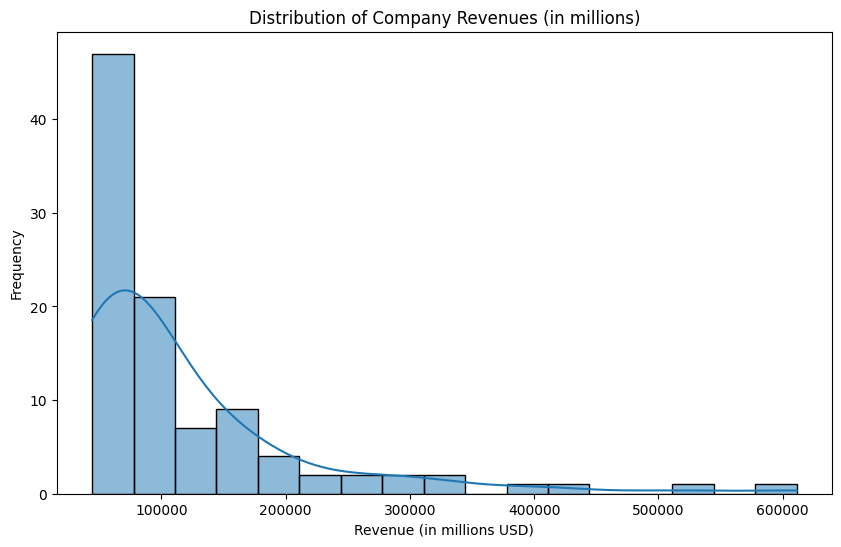

In [7]:
# Revenue distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue (USD millions)'], kde=True)
plt.title('Distribution of Company Revenues (in millions)')
plt.xlabel('Revenue (in millions USD)')
plt.ylabel('Frequency')
plt.show()


## Sector Analysis

Analyzing the distribution of companies across different sectors.


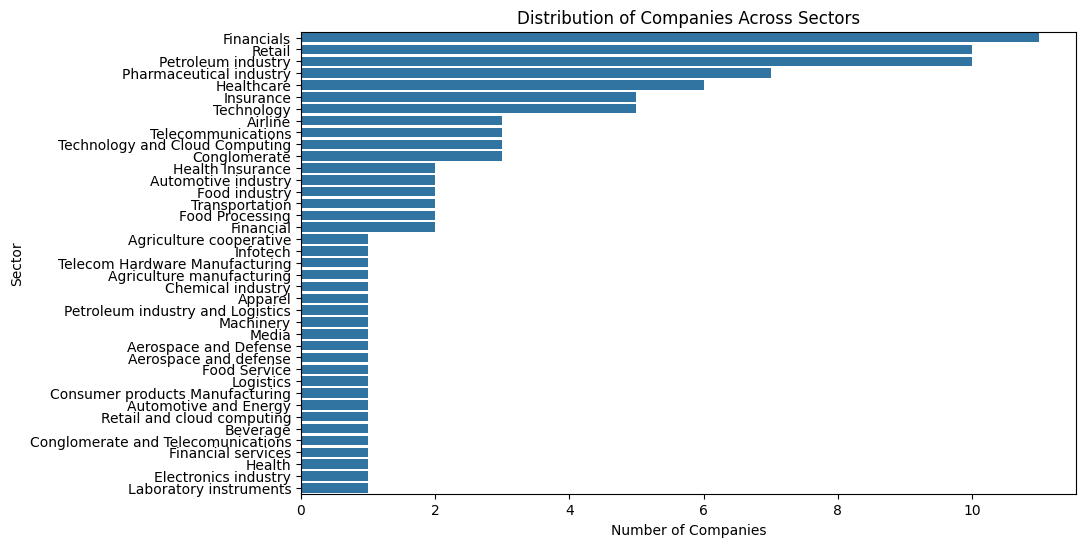

In [8]:
# Sector-wise distribution
sector_counts = df['Industry'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=sector_counts.values, y=sector_counts.index)
plt.title('Distribution of Companies Across Sectors')
plt.xlabel('Number of Companies')
plt.ylabel('Sector')
plt.show()


## Revenue Growth Analysis

Examining the growth percentages to identify rapidly expanding sectors.


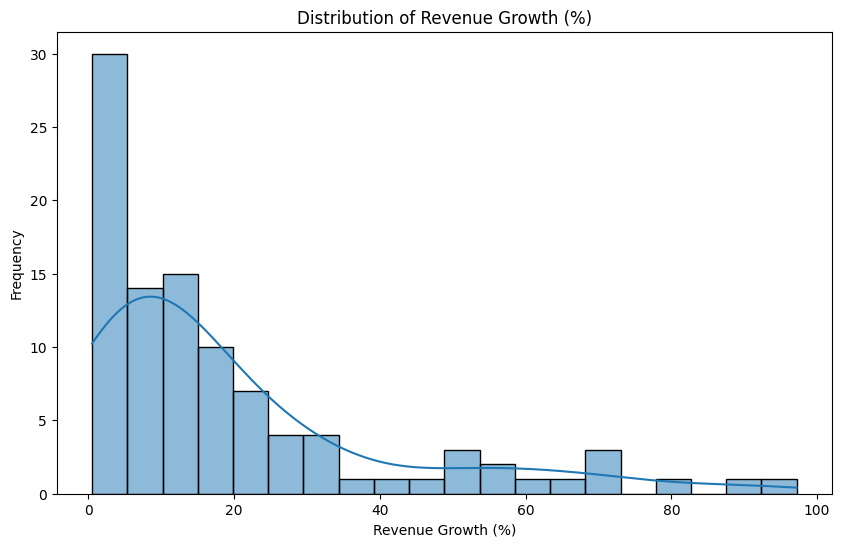

In [9]:
# Revenue growth distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue growth'], kde=True, bins=20)
plt.title('Distribution of Revenue Growth (%)')
plt.xlabel('Revenue Growth (%)')
plt.ylabel('Frequency')
plt.show()


# Conclusion

In this notebook, we successfully demonstrated the use of the `SitemapParser` class to parse and analyze sitemaps from "https://www.codingninjas.com". This approach can be adapted to various websites to understand their structure and content organization.

This notebook demonstrated how to fetch and analyze spaceflight news articles using the `SpaceflightNewsScraper` class. The API provides valuable data that can be used for various analytical purposes, such as trend analysis in space news.


In this notebook, we successfully utilized the `WikiTableParser` class to scrape and analyze tables from a Wikipedia page. This technique can be applied to other pages for gathering structured data in a tabular format for analysis.

Through this analysis, we gained insights into the revenue distribution, sector diversity, and growth patterns of the largest companies in the United States. This dataset provides a valuable perspective on the corporate landscape and economic trends in the US.



## References :
Task 1:
- Website: [Coding Ninjas](https://www.codingninjas.com/)
- Sitemap: [https://www.codingninjas.com/sitemap.xml](https://www.codingninjas.com/sitemap.xml)
- Python class code: [XMLParser.py](https://github.com/yourusername/XMLParser/blob/main/XMLParser.py)

Task 2:
- API: [SpaceFlight News API](https://api.spaceflightnewsapi.net/)
- API Endpoint: [https://api.spaceflightnewsapi.net/v4/articles/?limit=500&offset=500](https://api.spaceflightnewsapi.net/v4/articles/?limit=500&offset=500)
- Python class code: [APIRequest.py](https://github.com/yourusername/APIRequest/blob/main/APIRequest.py)

Task 3:
- Website: [Wikipedia - List of largest companies in the United States by revenue](https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue)
- Python class code: [WebScraper.py](https://github.com/yourusername/WebScraper/blob/main/WebScraper.py)